---
# Chapter 1: Pre-*requisites*
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

Loading the data

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

Some checking

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)



---
# ***Chapter 2: Preparing the data***
---


 ***Converting 2D pixels to 1D***



In [45]:
x_train = x_train.reshape(x_train.shape[0],-1)/255 #Creates 60000 rows of 784 coloumn wide Matrix
x_test = x_test.reshape(x_test.shape[0],-1)/255#Creates 60000 rows of 784 coloumn wide Matrix
x_train.shape,x_test.shape

((60000, 784), (10000, 784))



---


 ***One Hot Encoding***🔥


In [46]:
y_train_encoded = np.eye(10)[y_train]
y_test_encoded = np.eye(10)[y_test]

---

#**Chapter 3: The meat**

---

#***The Neural Network***



Epoch 0, Loss: 2.5015
Epoch 1, Loss: 2.5000
Epoch 2, Loss: 2.4986
Epoch 3, Loss: 2.4971
Epoch 4, Loss: 2.4957
Epoch 5, Loss: 2.4943
Epoch 6, Loss: 2.4928
Epoch 7, Loss: 2.4914
Epoch 8, Loss: 2.4900
Epoch 9, Loss: 2.4886
Epoch 10, Loss: 2.4872
Epoch 11, Loss: 2.4857
Epoch 12, Loss: 2.4843
Epoch 13, Loss: 2.4829
Epoch 14, Loss: 2.4815
Epoch 15, Loss: 2.4801
Epoch 16, Loss: 2.4787
Epoch 17, Loss: 2.4772
Epoch 18, Loss: 2.4758
Epoch 19, Loss: 2.4744
Epoch 20, Loss: 2.4730
Epoch 21, Loss: 2.4715
Epoch 22, Loss: 2.4701
Epoch 23, Loss: 2.4687
Epoch 24, Loss: 2.4672
Epoch 25, Loss: 2.4658
Epoch 26, Loss: 2.4643
Epoch 27, Loss: 2.4629
Epoch 28, Loss: 2.4614
Epoch 29, Loss: 2.4600
Epoch 30, Loss: 2.4585
Epoch 31, Loss: 2.4570
Epoch 32, Loss: 2.4555
Epoch 33, Loss: 2.4540
Epoch 34, Loss: 2.4525
Epoch 35, Loss: 2.4510
Epoch 36, Loss: 2.4495
Epoch 37, Loss: 2.4480
Epoch 38, Loss: 2.4465
Epoch 39, Loss: 2.4449
Epoch 40, Loss: 2.4434
Epoch 41, Loss: 2.4418
Epoch 42, Loss: 2.4402
Epoch 43, Loss: 2.438

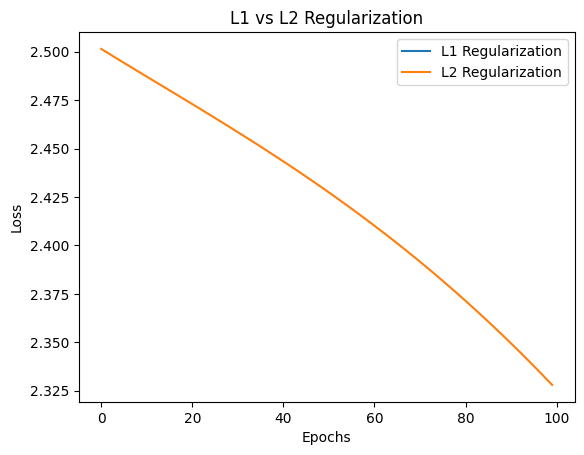

In [83]:
import numpy as np

class Neural_Network:
  def __init__(self,inputsize,hiddensize,outputsize,lr=0.01,ld1=0.0,ld2=0.0):
        self.W1 = np.random.randn(inputsize, hiddensize) * 0.01
        self.b1 = np.zeros((1, hiddensize))
        self.W2 = np.random.randn(hiddensize, outputsize) * 0.01
        self.b2 = np.zeros((1, outputsize))
        self.loss_history = []
        self.l1_lambda = ld1
        self.l2_lambda = ld2
        self.lr = lr
  # def sigmoid(self,x):
  #   return 1/1+exp(-x)
  # def tanh(self,x):
  #   return np.tanh(x)
  # def tanh_derivative(self,x):
  #   return 1 - np.tanh(x) ** 2
  # def relu(self,x):
  #   for i in range(x.shape[0]):
  #     for j in range(x.shape[1]):
  #       if (x[i][j] < 0):
  #         x[i][j] = 0
  #   return x
  # def relu(self,x):
  #   return np.where(x > 0, 1, 0)
  def softmax(self,x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)
  def forward(self,x):
    self.z1=np.dot(x,self.W1)+self.b1
    self.a1=self.softmax(self.z1)
    self.z2=np.dot(self.a1,self.W2)+self.b2
    self.a2=self.softmax(self.z2)
    return self.a2
  def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m


        dW1 += self.l1_lambda * np.sign(self.W1)
        dW2 += self.l1_lambda * np.sign(self.W2)


        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
  def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Calculate loss with regularization penalties
            if regularization_type == "L1":
                penalty = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
            else:  # L2 Regularization by default
                penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
            self.loss_history.append(loss)

            if epoch % 1 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
  def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# nn_l1 = Neural_Network(inputsize=784, hiddensize=128, outputsize=10, lr=0.01, ld1=0.01)
nn_l2 = Neural_Network(inputsize=784, hiddensize= 256 , outputsize=10, lr=0.05, ld2=0.01)
epochs = 800
# nn_l1.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L1")
nn_l2.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L2")
plt.plot(nn_l1.loss_history, label='L1 Regularization')
plt.plot(nn_l2.loss_history, label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('l1 vs l2 Regulztn')
plt.legend()
plt.show()




In [82]:
predictions = nn_l2.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.3752
